# AUTOMOBILE DATA ANALYSIS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\MY PC\Desktop\Auto data.csv')
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
df.shape

(205, 25)

In [4]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

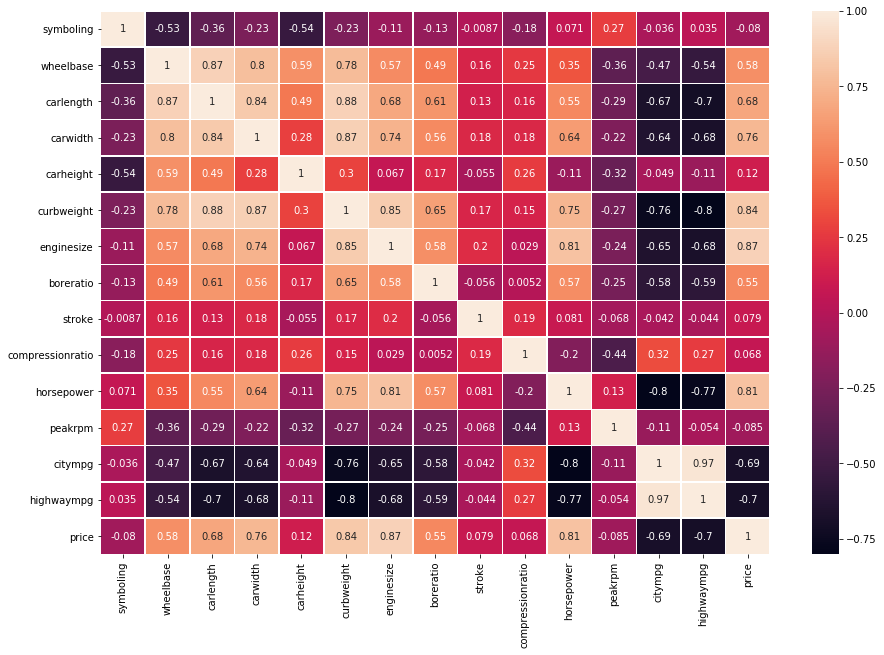

In [5]:
data = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(data , annot = True  , linewidth = 0.5)

#### 1) As we can see , target variable "price" shows high correlation with "horsepower" , "bore-ratio" , "engine size" , "curb weight" , "car width" , "car length" , "car height" and "wheel-base"

#### 2) Among the above mentioned variables, there are some variables which are highly correlated with one another which will result in Multicollinearity.

#### 3) Hence, the variables "car width"  , "car length" ,  "engine size and "curb weight" are dropped.

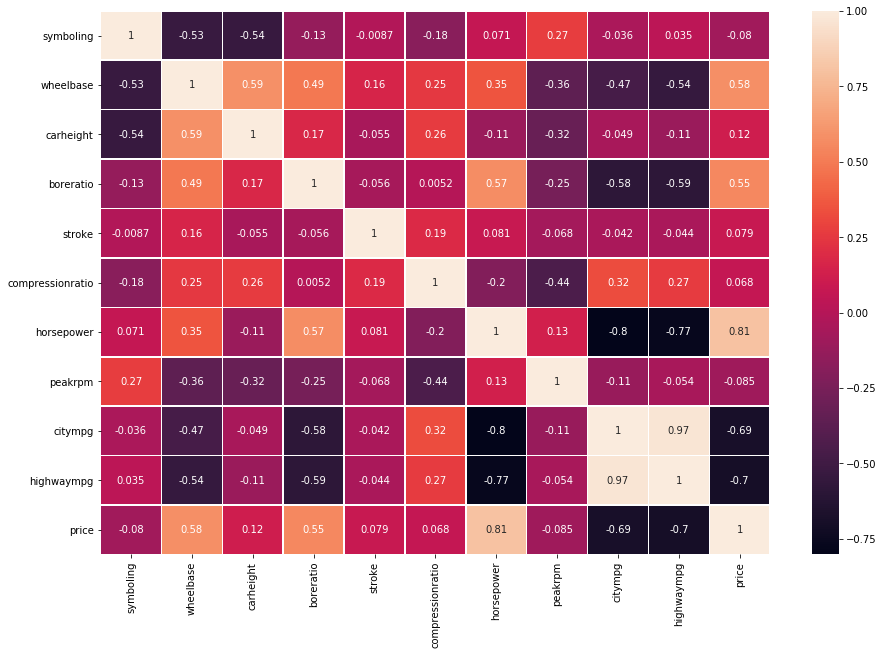

In [6]:
df_new = df.drop(["carlength" , "carwidth" , "curbweight" , "enginesize"] , axis=1)
plt.figure(figsize = (15,10))
sns.heatmap(df_new.corr() , annot = True  , linewidth = 0.5)

In [7]:
from word2number import w2n
nums = []
for i in df_new['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
df_new['cylindernumber'] = nums

In [8]:
num_features = list(df_new._get_numeric_data().columns)
all_columns = list(df_new.columns)

In [9]:
cat_columns = []
for i in all_columns :
    if i not in num_features:
        cat_columns.append(i)
print(cat_columns)   

['make', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']


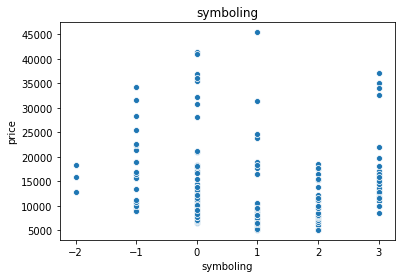

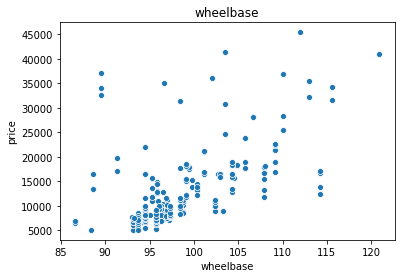

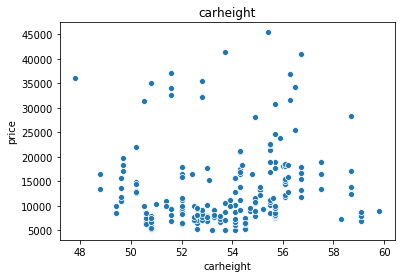

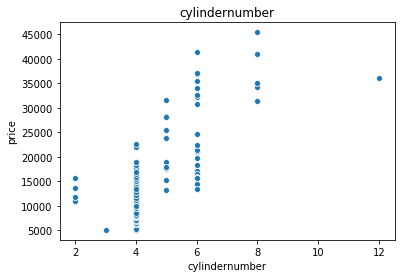

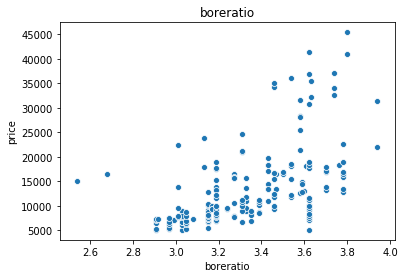

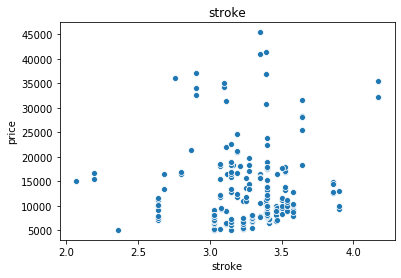

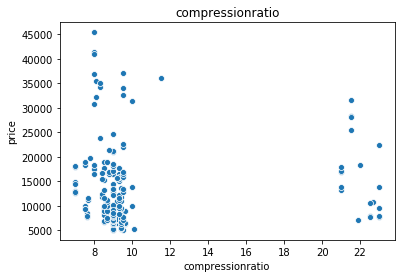

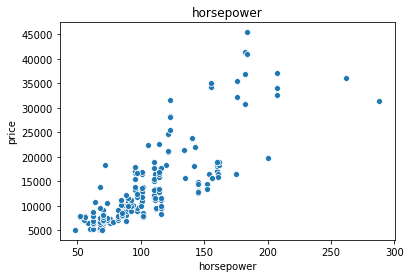

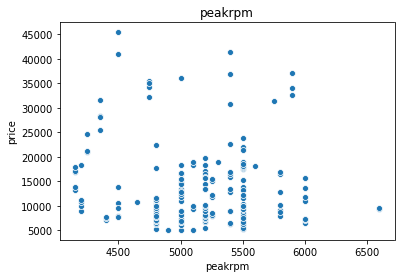

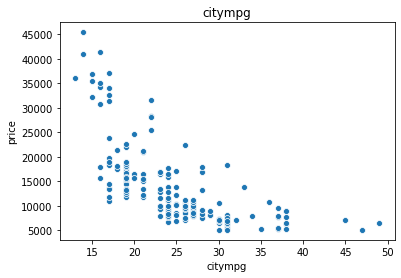

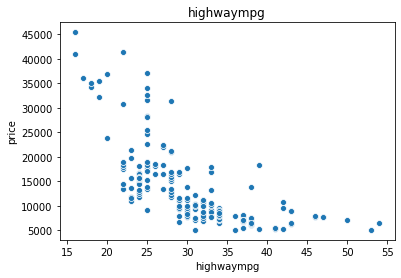

In [10]:
for i in num_features[:-1]:
    plt.title(i)
    sns.scatterplot(df_new[i],df_new['price'])
    plt.show()

#### ANALYZED RESULTS

1. Cars generally have a wheel base varying between 92-100. Inceased wheel base have increased price.
2. Car height is in between 52-54. Height 57 is showing high price.
3. Bore-ratio is showing a linear distribution;with increase in ratio price is increasing.
4. Horsepower also showing a linear distribution till 200.
5. Stroke is generally between 3-3.5 and prices are very high at around 3.3-3.4 stroke.
6. RPM are generally between 5000-5500 and rpm around 4500 and 5400 and hiking the price.

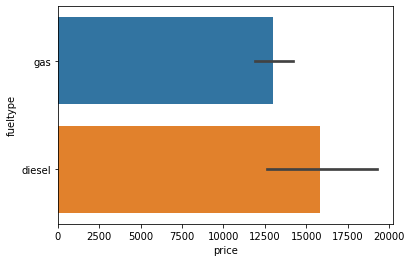

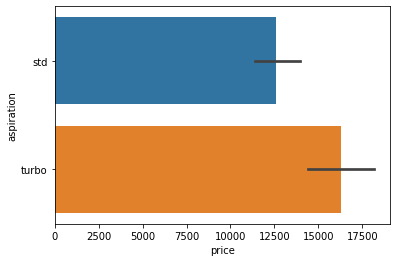

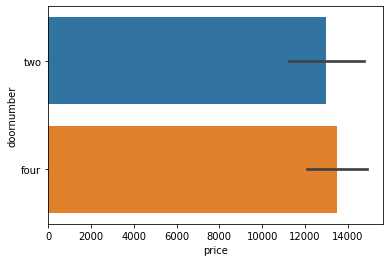

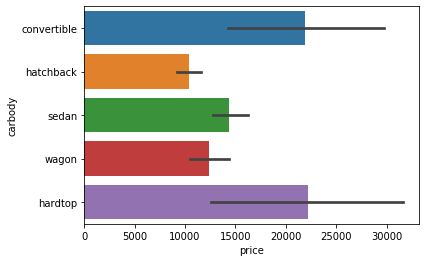

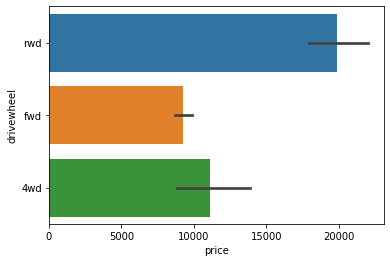

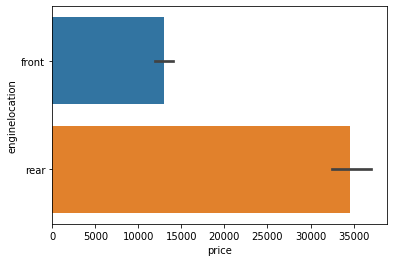

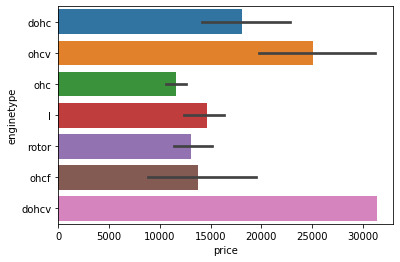

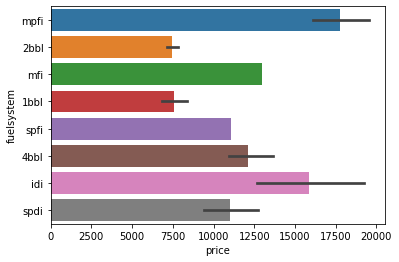

In [11]:
for i in cat_columns[1:] :
    sns.barplot(df_new["price"] , df_new[i])
    plt.show()

### ANALYZED RESULTS

1. Cars having diesel fueltype are high priced.
2. TUrbo aspiration are increasing prices.
3. Convertible and hardtop car bodies are high priced.
4. Rear engine location is high priced.
5. 'dohcv' engine type are high priced followed by 'ohcv'.
6. 'mpfi' fuelsystems are highly increasing the prices followed by 'idi' type. 

In [12]:
df_new["make"].value_counts()

toyota corolla          6
toyota corona           6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
toyota celica gt        1
volvo 246               1
isuzu MU-X              1
volvo 245               1
subaru r2               1
Name: make, Length: 147, dtype: int64

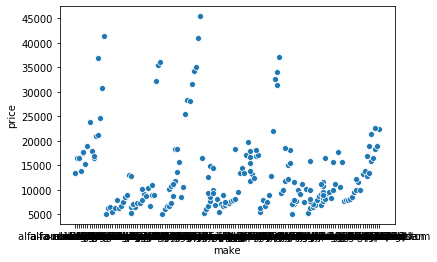

In [13]:
sns.scatterplot(df_new["make"] , df["price"])

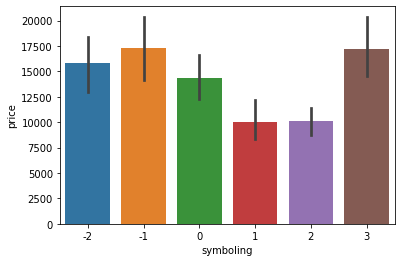

In [14]:
sns.barplot(df_new["symboling"] , df_new["price"])

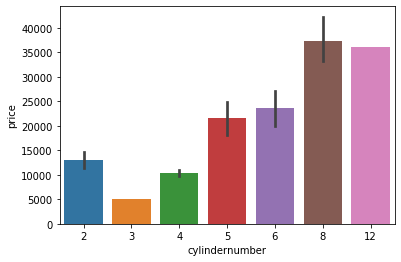

In [15]:
sns.barplot(df_new["cylindernumber"] , df_new["price"])

### ANALYZED RESULTS

1. The different sub-types of all catagorical columns vary in prices with satisfactory difference except "doornumbers".
2. There are 147 different "makes" but they too vary in prices satisfactorily.
3. Cars with a low risk factor,i.e,a symboling of -1 or -2 are high-priced & cars with high risk factor(symboling = 3) are also
high priced.
4. A very high number of cylinders (8 or 12)  is hiking the price.

In [16]:
df_new.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carheight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [17]:
df_new = df_new.drop("doornumber" , axis = 1)
df_new.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carheight', 'enginetype',
       'cylindernumber', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# DATA PREPROCESSING

In [18]:
num_features1 = list(df_new._get_numeric_data().columns)
data = df[num_features1]
data

,symboling,wheelbase,carheight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,48.8,four,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,48.8,four,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,52.4,six,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,54.3,four,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,54.3,five,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,55.5,four,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,55.5,four,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,55.5,six,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,55.5,six,3.01,3.40,23.0,106,4800,26,27,22470.0


In [19]:
all_columns1 = list(df_new.columns)
all_columns1

['symboling',
 'make',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'wheelbase',
 'carheight',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [20]:
cat_columns1 = []
for i in all_columns1 :
    if i not in num_features1:
        cat_columns1.append(i)
print(cat_columns1)

['make', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem']


In [21]:
df_cat = df_new[cat_columns1]
df_cat

,make,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi
...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,rwd,front,ohc,mpfi
201,volvo 144ea,gas,turbo,sedan,rwd,front,ohc,mpfi
202,volvo 244dl,gas,std,sedan,rwd,front,ohcv,mpfi
203,volvo 246,diesel,turbo,sedan,rwd,front,ohc,idi


In [22]:
from sklearn.preprocessing import LabelEncoder
lb_encode = LabelEncoder()

In [23]:
data_new = df_cat.apply(lb_encode.fit_transform)
data_new

,make,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,2,1,0,0,2,0,0,5
1,3,1,0,0,2,0,0,5
2,1,1,0,2,2,0,5,5
3,4,1,0,3,1,0,3,5
4,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...
200,139,1,0,3,2,0,3,5
201,138,1,1,3,2,0,3,5
202,140,1,0,3,2,0,5,5
203,142,0,1,3,2,0,3,3


In [24]:
new_df = data.join(data_new)
new_df

,symboling,wheelbase,carheight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,3,88.6,48.8,four,3.47,2.68,9.0,111,5000,21,27,13495.0,2,1,0,0,2,0,0,5
1,3,88.6,48.8,four,3.47,2.68,9.0,111,5000,21,27,16500.0,3,1,0,0,2,0,0,5
2,1,94.5,52.4,six,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,2,2,0,5,5
3,2,99.8,54.3,four,3.19,3.40,10.0,102,5500,24,30,13950.0,4,1,0,3,1,0,3,5
4,2,99.4,54.3,five,3.19,3.40,8.0,115,5500,18,22,17450.0,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,55.5,four,3.78,3.15,9.5,114,5400,23,28,16845.0,139,1,0,3,2,0,3,5
201,-1,109.1,55.5,four,3.78,3.15,8.7,160,5300,19,25,19045.0,138,1,1,3,2,0,3,5
202,-1,109.1,55.5,six,3.58,2.87,8.8,134,5500,18,23,21485.0,140,1,0,3,2,0,5,5
203,-1,109.1,55.5,six,3.01,3.40,23.0,106,4800,26,27,22470.0,142,0,1,3,2,0,3,3


In [25]:
from word2number import w2n
nums = []
for i in new_df['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
new_df['cylindernumber'] = nums

new_df

,symboling,wheelbase,carheight,cylindernumber,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,make,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,3,88.6,48.8,4,3.47,2.68,9.0,111,5000,21,27,13495.0,2,1,0,0,2,0,0,5
1,3,88.6,48.8,4,3.47,2.68,9.0,111,5000,21,27,16500.0,3,1,0,0,2,0,0,5
2,1,94.5,52.4,6,2.68,3.47,9.0,154,5000,19,26,16500.0,1,1,0,2,2,0,5,5
3,2,99.8,54.3,4,3.19,3.40,10.0,102,5500,24,30,13950.0,4,1,0,3,1,0,3,5
4,2,99.4,54.3,5,3.19,3.40,8.0,115,5500,18,22,17450.0,5,1,0,3,0,0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,55.5,4,3.78,3.15,9.5,114,5400,23,28,16845.0,139,1,0,3,2,0,3,5
201,-1,109.1,55.5,4,3.78,3.15,8.7,160,5300,19,25,19045.0,138,1,1,3,2,0,3,5
202,-1,109.1,55.5,6,3.58,2.87,8.8,134,5500,18,23,21485.0,140,1,0,3,2,0,5,5
203,-1,109.1,55.5,6,3.01,3.40,23.0,106,4800,26,27,22470.0,142,0,1,3,2,0,3,3


# UNIVARIATE ANALYSIS

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [27]:
x_data = new_df["horsepower"]
y_data = new_df["price"]

#### Selected "horsepower" as the best variable for analysis.

In [28]:
print(x_data.shape)

(205,)


In [29]:
x_data1 = x_data.values.reshape((205,1))
print(x_data1.shape)

(205, 1)


In [30]:
x_train , x_test , y_train , y_test = train_test_split(x_data1 , y_data , train_size = 0.7 , random_state = 42)

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 1)
(62, 1)
(143,)
(62,)


In [32]:
lr = LinearRegression()
lr.fit(x_train , y_train)
y_predicted = lr.predict(x_test)

In [33]:
print("The r2 score of the model is : " , r2_score(y_test,y_predicted) * 100 , "%")
print()
print("Co-efficient of the model is :" , lr.coef_[0])
print()
print("Intercept of the model is :" , lr.intercept_)

The r2 score of the model is :  63.9317612586493 %

Co-efficient of the model is : 157.52524028053594

Intercept of the model is : -3241.804243638466


Text(0.5, 1.0, 'Horsepower Vs. Price')

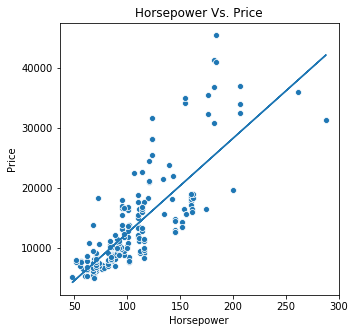

In [34]:
plt.figure(figsize = (5,5))
sns.scatterplot(x_data , y_data)
plt.plot(x_data,lr.predict(x_data1))
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Horsepower Vs. Price")

# MULTIVARIATE ANALYSIS

### Self-analysed variables

In [35]:
X_data = new_df.drop(["price"] , axis = 1)
Y_data = new_df["price"]

In [36]:
X_train , X_test , Y_train , Y_test = train_test_split(X_data , Y_data , train_size = 0.7 , random_state = 42)

In [37]:
lr.fit(X_train , Y_train)
Y_predicted = lr.predict(X_test)

In [38]:
print("The r2 score of the model is : " , r2_score(Y_test,Y_predicted) * 100 , "%")
print()
print("Co-efficient of the model is :" , lr.coef_)
print()
print("Intercept of the model is :" , lr.intercept_)

The r2 score of the model is :  82.89513594802531 %

Co-efficient of the model is : [ 2.28962002e+02  5.06967155e+02  1.17600905e+02  1.84997479e+03
  2.51179642e+03 -1.51951830e+02  7.24921167e+02  4.97749514e+01
  5.41008050e-01 -1.70477870e+02 -1.67749384e+01 -2.77320015e+01
  6.83747192e+03  1.41636680e+02 -1.59122765e+03  9.50891572e+01
  1.07688581e+04  2.91307060e+02  1.43293635e+02]

Intercept of the model is : -71393.28124490155


In [39]:
dataframe = pd.DataFrame()
dataframe["Importance"] = list(lr.coef_)
dataframe["Features"] = list(X_data.columns)
dataframe.set_index("Features" , inplace = True)
dataframe["Positive"] = dataframe["Importance"] > 0

Text(0.5, 1.0, 'Importance Vs. Features')

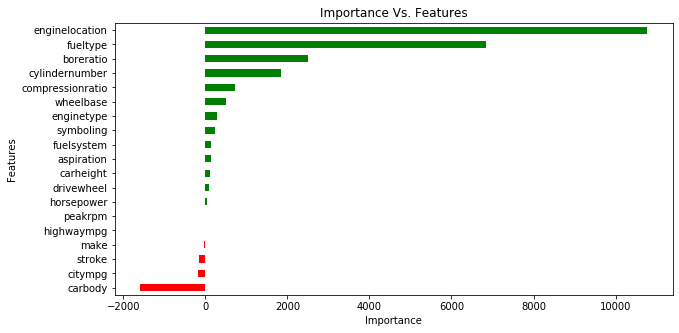

In [40]:
dataframe.sort_values(by = ["Importance"] , inplace = True)
plt.figure(figsize = (10,5)) 
dataframe.Importance.plot(kind = 'barh' , color = dataframe.Positive.map({True: 'green', False: 'red'}))
plt.xlabel("Importance")
plt.title("Importance Vs. Features")

### RFE-based variables

In [41]:
X_data1 = new_df.drop(["price"] , axis = 1)
Y_data1 = new_df["price"]

In [42]:
rfe = RFE(lr , 8)
rfe.fit(X_train,Y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=8, step=1, verbose=0)

In [43]:
new_features = X_train.columns[rfe.support_]
new_features

Index(['cylindernumber', 'boreratio', 'citympg', 'fueltype', 'aspiration',
       'carbody', 'drivewheel', 'enginelocation'],
      dtype='object')

In [44]:
lr.fit(X_train[new_features] , Y_train)
Y_predicted_new = lr.predict(X_test[new_features])

In [45]:
print("The r2 score of the model is : " , r2_score(Y_test,Y_predicted_new) * 100 , "%")
print()
print("Co-efficient of the model is :" , lr.coef_)
print()
print("Intercept of the model is :" , lr.intercept_)

The r2 score of the model is :  75.02269407789599 %

Co-efficient of the model is : [ 3017.2311001   3480.29540063  -567.53280852 -5083.17883796
   146.52710389  -427.06382743  1765.7282706   7903.63488741]

Intercept of the model is : 5881.517582711151


In [46]:
dataframe1 = pd.DataFrame()
dataframe1["Importance"] = list(lr.coef_)
dataframe1["Features"] = list(new_features)
dataframe1.set_index("Features" , inplace = True)
dataframe1["Positive"] = dataframe1["Importance"] > 0

Text(0.5, 1.0, 'Importance Vs. Features')

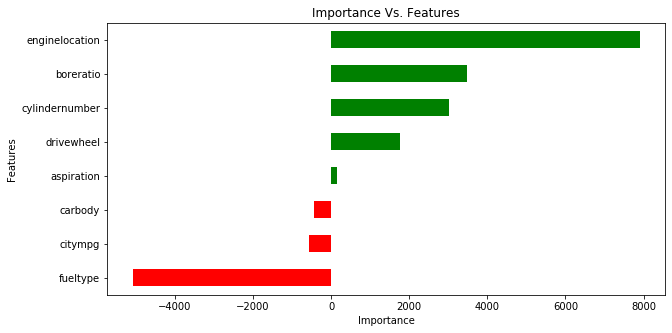

In [47]:
dataframe1.sort_values(by = ["Importance"] , inplace = True)
plt.figure(figsize = (10,5)) 
dataframe1.Importance.plot(kind = 'barh' , color = dataframe1.Positive.map({True: 'green', False: 'red'}))
plt.xlabel("Importance")
plt.title("Importance Vs. Features")

# CONCLUSION

In [48]:
print("UNIVARIATE MODEL")
print("r2 score : " , r2_score(y_test,y_predicted) * 100 , "%")
print()
print()
print("MULTIVARIATE MODEL WITH SELF-ANALYSED VARIABLES")
print("r2 score : " , r2_score(Y_test,Y_predicted) * 100 , "%")
print()
print()
print("MULTIVARIATE MODEL WITH RFE-BASED VARIABLES")
print("r2 score : " , r2_score(Y_test,Y_predicted_new) * 100 , "%")

UNIVARIATE MODEL
r2 score :  63.9317612586493 %


MULTIVARIATE MODEL WITH SELF-ANALYSED VARIABLES
r2 score :  82.89513594802531 %


MULTIVARIATE MODEL WITH RFE-BASED VARIABLES
r2 score :  75.02269407789599 %


#### 1) We can see that as there was a very high correlation between "horsepower" and "price" , hence "horsepower" was finally able to explain approximately 64% of variation in "price" variable. Also it gave us a good fit in the end.

#### 2)After dropping variables to avoid multicollinearity, all the other 18 variables were able to explain approximately 83% of variation in "price" and hence gave a very good model.

#### 3) Even after selecting top 8 variables(almost half of the total variables) , the model was able to explain 75% of the variation in "price" and thus,can be considered a good model.

#### 4) In both the cases of multivariate analysis, we can see that  "engine location" , "cylinder number" , "drive wheel" and "bore ratio" has been the major driving features for "price".